# Exploratory Data Analysis

## 1. Packages

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode

## 2. Job Descriptions

### 2.1 First look

In [65]:
jobs = pd.read_csv('data/jobs_labelled.csv', index_col=0)
jobs.head(10)

,Id,Title,Type,Salary,Description,City,Postcode,MinSalary,MaxSalary
0,6023e9a16d1a1b0017ac621a,"iOS Developer (Remote, UK Based)",SE,"45,000 - 55,000 GBP per year","Salary 45,000 - 55,000 GBP per year Requiremen...",London,SE1 9PG,45000,55000
1,6023ead06d1a1b0017ac621b,Junior QA Engineer,QA,"25,000 - 35,000 GBP per year","Salary 25,000 - 35,000 GBP per year Requiremen...",London,SE1 9PG,25000,35000
2,6023eba46d1a1b0017ac621c,Software Developer in Test (SDET),QA,"30,000 - 40,000 GBP per year","Salary 30,000 - 40,000 GBP per year Requiremen...",London,SE1 9PG,30000,40000
3,6023ebd56d1a1b0017ac621d,Senior Android Developer,SE,"60,000 - 70,000 GBP per year","Salary 60,000 - 70,000 GBP per year Requiremen...",London,SE1 9PG,60000,70000
4,6023ecec6d1a1b0017ac621e,"Senior Software Engineer, Investment Platform",SE,"65,000 - 80,000 GBP per year","Salary 65,000 - 80,000 GBP per year Requiremen...",London,SE1 9PG,65000,80000
5,60244e686d1a1b0017ac6227,"Senior Software Engineer, Cloud Apps",SE,"65,000 - 80,000 GBP per year","Salary 65,000 - 80,000 GBP per year Requiremen...",London,SE1 9PG,65000,80000
6,6034f597ce54d60017a592a7,DevOps Engineer,DevOps,"40,000 - 50,000 GBP per year","Salary 40,000 - 50,000 GBP per year Requiremen...",London,EC1Y8PD,40000,50000
7,6034f5fcce54d60017a592a8,Technical Lead,Management,"70,000 - 90,000 GBP per year","Salary 70,000 - 90,000 GBP per year Requiremen...",London,EC1Y8PD,70000,90000
8,6034f60dce54d60017a592a9,Backend Engineer,SE,"40,000 - 60,000 GBP per year","Salary 40,000 - 60,000 GBP per year Requiremen...",London,EC1Y8PD,40000,60000
9,6035689b3f528400179c10cc,Front-End Developer,SE,"50,000 - 65,000 GBP per year","Salary 50,000 - 65,000 GBP per year Requiremen...",London,N1 8QG,50000,65000


In [66]:
jobs.describe()

,MinSalary,MaxSalary
count,454.000000,454.00000
mean,50837.004405,66993.39207
std,21253.849843,25162.64884
min,10000.000000,10000.00000
25%,35000.000000,50000.00000
50%,50000.000000,65000.00000
75%,60000.000000,83750.00000
max,190000.000000,220000.00000


### 2.2 Job no. x Location

In [67]:
nomi = pgeocode.Nominatim('GB')
locations = jobs['Postcode'].apply(lambda p: nomi.query_postal_code(p))

jobs['State'] = locations['state_name']
jobs['County'] = locations['county_name']

locations.head()

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,SE1,GB,"Bermondsey, Waterloo, Lambeth, New Kent Road, ...",England,ENG,Greater London,11609024,NaN,NaN,51.498746,-0.093038,4.0
1,SE1,GB,"Bermondsey, Waterloo, Lambeth, New Kent Road, ...",England,ENG,Greater London,11609024,NaN,NaN,51.498746,-0.093038,4.0
2,SE1,GB,"Bermondsey, Waterloo, Lambeth, New Kent Road, ...",England,ENG,Greater London,11609024,NaN,NaN,51.498746,-0.093038,4.0
3,SE1,GB,"Bermondsey, Waterloo, Lambeth, New Kent Road, ...",England,ENG,Greater London,11609024,NaN,NaN,51.498746,-0.093038,4.0
4,SE1,GB,"Bermondsey, Waterloo, Lambeth, New Kent Road, ...",England,ENG,Greater London,11609024,NaN,NaN,51.498746,-0.093038,4.0


In [68]:
import pydeck as pdk

pdk.Deck(
     map_style='light',
     initial_view_state=pdk.ViewState(
         latitude=55.3781,
         longitude=3.360,
         zoom=4.3
     ),
     layers=[
         pdk.Layer(
             'HeatmapLayer',
             data=locations,
             get_position='[longitude, latitude]'
         ),
     ],
 )

{
  "initialViewState": {
    "latitude": 55.3781,
    "longitude": 3.36,
    "zoom": 4.3
  },
  "layers": [
    {
      "@@type": "HeatmapLayer",
      "data": [
        {
          "accuracy": 4.0,
          "community_code": NaN,
          "community_name": NaN,
          "country_code": "GB",
          "county_code": "11609024",
          "county_name": "Greater London",
          "latitude": 51.49874615384616,
          "longitude": -0.0930384615384615,
          "place_name": "Bermondsey, Waterloo, Lambeth, New Kent Road, London Bridge, Borough, Southwark Cathedral, Newington, Westminster Bridge, Lambeth North, Southwark, Old Kent Road, South Bank",
          "postal_code": "SE1",
          "state_code": "ENG",
          "state_name": "England"
        },
        {
          "accuracy": 4.0,
          "community_code": NaN,
          "community_name": NaN,
          "country_code": "GB",
          "county_code": "11609024",
          "county_name": "Greater London",
          "latitude": 51.49874615384616,
          "longitude": -0.0930384615384615,
          "place_name": "Bermondsey, Waterloo, Lambeth, New Kent Road, London Bridge, Borough, Southwark Cathedral, Newington, Westminster Bridge, Lambeth North, Southwark, Old Kent Road, South Bank",
          "postal_code": "SE1",
          "state_code": "ENG",
          "state_name": "England"
        },
        {
          "accuracy": 4.0,
          "community_code": NaN,
          "community_name": NaN,
          "country_code": "GB",
          "county_code": "11609024",
          "county_name": "Greater London",
          "latitude": 51.49874615384616,
          "longitude": -0.0930384615384615,
          "place_name": "Bermondsey, Waterloo, Lambeth, New Kent Road, London Bridge, Borough, Southwark Cathedral, Newington, Westminster Bridge, Lambeth North, Southwark, Old Kent Road, South Bank",
          "postal_code": "SE1",
          "state_code": "ENG",
          "state_name": "England"
        },
        {
          "accuracy": 4.0,
          "community_code": NaN,
          "community_name": NaN,
          "country_code": "GB",
          "county_code": "11609024",
          "county_name": "Greater London",
          "latitude": 51.49874615384616,
          "longitude": -0.0930384615384615,
          "place_name": "Bermondsey, Waterloo, Lambeth, New Kent Road, London Bridge, Borough, Southwark Cathedral, Newington, Westminster Bridge, Lambeth North, Southwark, Old Kent Road, South Bank",
          "postal_code": "SE1",
          "state_code": "ENG",
          "state_name": "England"
        },
        {
          "accuracy": 4.0,
          "community_code": NaN,
          "community_name": NaN,
          "country_code": "GB",
          "county_code": "11609024",
          "county_name": "Greater London",
          "latitude": 51.49874615384616,
          "longitude": -0.0930384615384615,
          "place_name": "Bermondsey, Waterloo, Lambeth, New Kent Road, London Bridge, Borough, Southwark Cathedral, Newington, Westminster Bridge, Lambeth North, Southwark, Old Kent Road, South Bank",
          "postal_code": "SE1",
          "state_code": "ENG",
          "state_name": "England"
        },
        {
          "accuracy": 4.0,
          "community_code": NaN,
          "community_name": NaN,
          "country_code": "GB",
          "county_code": "11609024",
          "county_name": "Greater London",
          "latitude": 51.49874615384616,
          "longitude": -0.0930384615384615,
          "place_name": "Bermondsey, Waterloo, Lambeth, New Kent Road, London Bridge, Borough, Southwark Cathedral, Newington, Westminster Bridge, Lambeth North, Southwark, Old Kent Road, South Bank",
          "postal_code": "SE1",
          "state_code": "ENG",
          "state_name": "England"
        },
        {
          "accuracy": NaN,
          "community_code": NaN,
          "community_name": NaN,
          "country_code": NaN,
          "county_code": NaN,
          "county_n

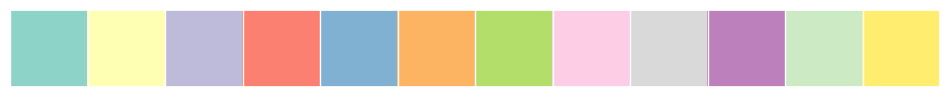

In [69]:
# useful resource re colour and data visualisation: https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/
# src for color_brewer palette: https://colorbrewer2.org/#type=qualitative&scheme=Set3&n=12
pal = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
sns.palplot(pal)

sns.set_theme(style="darkgrid", palette=pal)

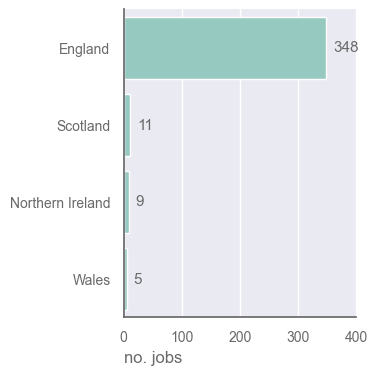

In [70]:
# get jobs per state
states = locations['state_name'].value_counts()

# make the chart
plt.figure(figsize=(3,4))

axis_labels = ['no. jobs', '']
data_labels = []

plt.xticks(fontsize=10, color='DimGrey')
plt.yticks(fontsize=10, color='DimGrey')
plt.gca().spines['left'].set_color('DimGrey')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('DimGrey')
plt.xlabel(axis_labels[0], fontsize=12, color='DimGrey', loc='left')
plt.ylabel(axis_labels[1], fontsize=12, color='DimGrey', loc='top')

plt.xlim(0, 400)

fig = sns.barplot(x=states.values[:4], y=states.index[:4], color=pal[0])

for p in fig.patches:
    fig.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
        xytext=(5,0), textcoords='offset points', ha="left", va="center", fontsize=11, color='DimGrey');

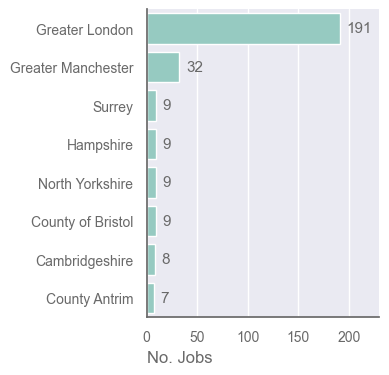

In [71]:
# get jobs per county
counties = locations['county_name'].value_counts()

# make the chart
plt.figure(figsize=(3,4))

axis_labels = ['No. Jobs', '']
data_labels = []

plt.xticks(fontsize=10, color='DimGrey')
plt.yticks(fontsize=10, color='DimGrey')
plt.gca().spines['left'].set_color('DimGrey')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('DimGrey')
plt.xlabel(axis_labels[0], fontsize=12, color='DimGrey', loc='left')
plt.ylabel(axis_labels[1], fontsize=12, color='DimGrey', loc='top')

plt.xlim(0, 230)

fig = sns.barplot(x=counties.values[:8], y=counties.index[:8], color=pal[0])

for p in fig.patches:
    fig.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
        xytext=(5,0), textcoords='offset points', ha="left", va="center", fontsize=11, color='DimGrey');



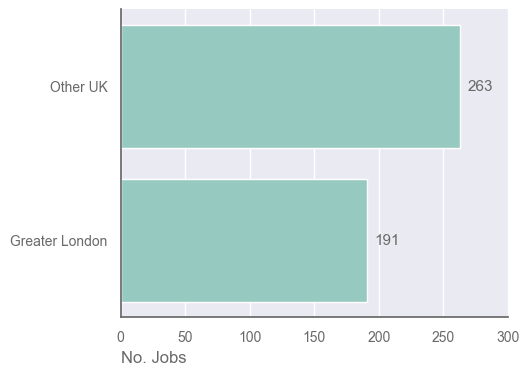

In [72]:
# get jobs per county
london_other = locations['county_name'].apply(lambda c: 'Other UK' if c != 'Greater London' else c)
london_other = london_other.value_counts()

# make the chart
plt.figure(figsize=(5,4))

axis_labels = ['No. Jobs', '']
data_labels = []

plt.xticks(fontsize=10, color='DimGrey')
plt.yticks(fontsize=10, color='DimGrey')
plt.gca().spines['left'].set_color('DimGrey')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('DimGrey')
plt.xlabel(axis_labels[0], fontsize=12, color='DimGrey', loc='left')
plt.ylabel(axis_labels[1], fontsize=12, color='DimGrey', loc='top')

plt.xlim(0, 300)

fig = sns.barplot(x=london_other.values, y=london_other.index, color=pal[0])

for p in fig.patches:
    fig.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
        xytext=(5,0), textcoords='offset points', ha="left", va="center", fontsize=11, color='DimGrey');

### 2.4 Job no. x Job type

In [73]:
def map_type(job_type):
    if job_type == 'IR' or job_type == 'Security analyst' or job_type == 'Sys Admin':
        return 'Security'
    elif job_type == 'Se' or job_type == 'SE':
        return 'Dev'
    elif job_type == 'Management':
        return 'Manager'
    elif job_type == 'Business analyst':
        return 'Data'
    elif job_type == 'Sales' or job_type == 'Researcher' or job_type == 'Design' or job_type == 'Consultant':
        return 'Other'
    else:
        return job_type
    

jobs['Job Type'] = jobs['Type'].apply(lambda t: map_type(t))
jobs['Job Type'].value_counts()

Dev         289
Other        40
Manager      33
DevOps       29
Security     19
Data         18
QA           14
IT           11
Name: Job Type, dtype: int64

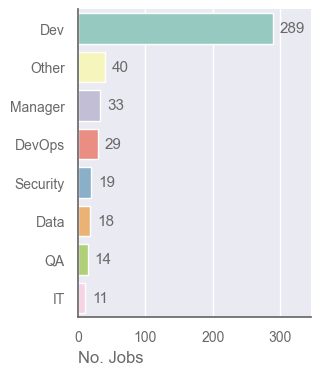

In [74]:
types = jobs['Job Type'].value_counts()

# make the chart
plt.figure(figsize=(3,4))

axis_labels = ['No. Jobs', '']
data_labels = []

plt.xticks(fontsize=10, color='DimGrey')
plt.yticks(fontsize=10, color='DimGrey')
plt.gca().spines['left'].set_color('DimGrey')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('DimGrey')
plt.xlabel(axis_labels[0], fontsize=12, color='DimGrey', loc='left')
plt.ylabel(axis_labels[1], fontsize=12, color='DimGrey', loc='top')

plt.xlim(0, 345)

fig = sns.barplot(x=types.values[:8], y=types.index[:8])

for p in fig.patches:
    fig.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
        xytext=(5,0), textcoords='offset points', ha="left", va="center", fontsize=11, color='DimGrey');

### 2.5 Salary x Location x Job type

In [75]:
jobs['IsLondon'] = locations['county_name'].apply(lambda c: 'Other UK' if c != 'Greater London' else c)
jobs['MeanSalary'] = jobs[['MinSalary', 'MaxSalary']].mean(axis=1)
jobs.head(2)

,Id,Title,Type,Salary,Description,City,Postcode,MinSalary,MaxSalary,State,County,Job Type,IsLondon,MeanSalary
0,6023e9a16d1a1b0017ac621a,"iOS Developer (Remote, UK Based)",SE,"45,000 - 55,000 GBP per year","Salary 45,000 - 55,000 GBP per year Requiremen...",London,SE1 9PG,45000,55000,England,Greater London,Dev,Greater London,50000.0
1,6023ead06d1a1b0017ac621b,Junior QA Engineer,QA,"25,000 - 35,000 GBP per year","Salary 25,000 - 35,000 GBP per year Requiremen...",London,SE1 9PG,25000,35000,England,Greater London,QA,Greater London,30000.0


[Text(33.874999999999986, 0.5, '')]

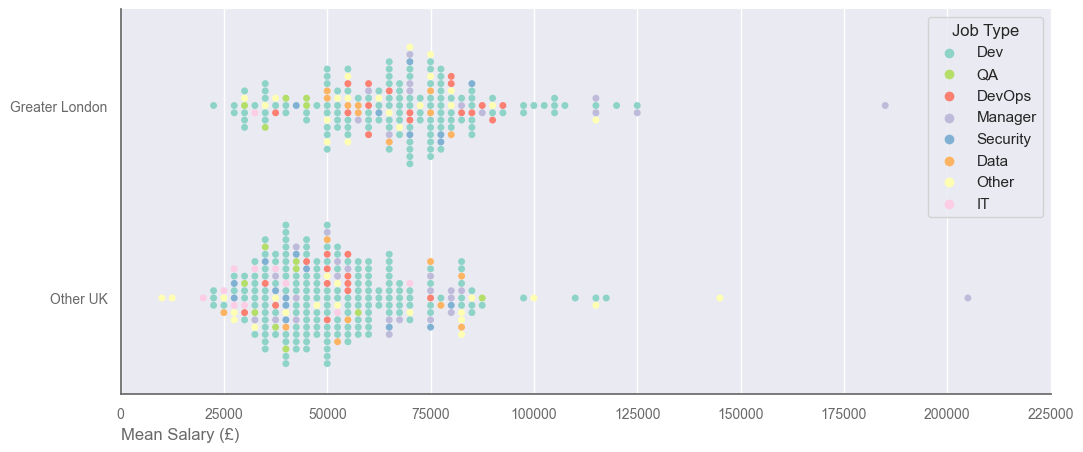

In [76]:
# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(12,5))

axis_labels = ['Mean Salary (£)', '']
data_labels = []

plt.xticks(fontsize=10, color='DimGrey')
plt.yticks(fontsize=10, color='DimGrey')
plt.gca().spines['left'].set_color('DimGrey')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('DimGrey')
plt.xlabel(axis_labels[0], fontsize=12, color='DimGrey', loc='left')
plt.ylabel(axis_labels[1], fontsize=12, color='DimGrey', loc='top')

plt.xlim(0, 225000)

# reorganise pallete to ensure consistency with colours + job types across plots
ax = sns.swarmplot(data=jobs, x="MeanSalary", y="IsLondon", hue='Job Type', palette=[pal[0], pal[6], pal[3], pal[2], pal[4], pal[5], pal[1], pal[7]])
ax.set(ylabel="")